# Symbolic regression

For simple function $y(x) = x^4 + x^3 + x^2 + x$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Generate data 

In [2]:
X = np.arange(-50,50,0.5)
Y = X**4 + X**3 + X**2 + X
X = X.reshape(-1,1)
TRIALS = 200

Add pycgp

In [3]:
from pycgp.selection import truncation_selection
from pycgp.mutation import point_mutation, active_mutation, single_mutation
from pycgp.evolution import evolution
from pycgp.params import DEFAULT_PARAMS

Specify evolution parameters, along with fitness function.

In [4]:
from sklearn.metrics import mean_squared_error

ev_params = {
  'cost_func': mean_squared_error,
  'target_fitness': 0,
  'gems': True,
  'j_box_size': 50
}


Specify the cartesian program structure and create individual factory

In [5]:
DEFAULT_PARAMS['n_rows'] = 1
DEFAULT_PARAMS['n_cols'] = 15
DEFAULT_PARAMS['n_inputs'] = 1
DEFAULT_PARAMS['n_outputs'] = 1

In [6]:
from pycgp.counter import Counter
import random

Create initial population and initial fitness

In [7]:
%%time

random.seed(1)

ev_params['gems'] = True

gems_all_evals = []
gems_all_bests = []
gems_stats = []

print('iteration:', end=' ')
for i in range(0, TRIALS):
    result = evolution(DEFAULT_PARAMS, ev_params, X, Y)
    gems_all_evals.append(result['evals'])
    gems_all_bests.append(result['final'][0])
    gems_stats.append(Counter.get().dict.copy())
    print('{},'.format(i), end=' ')
print('\n')

iteration: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

CPU times: user 38min 8s, sys: 6.05 s, total: 38min 14s
Wall time: 38min 57s


In [8]:
print('Number of improving gem applications: {}'.format(sum([x['g_better'] for x in gems_stats])))
print('Number of detoriorating gem applications: {}'.format(sum([x['g_worse'] for x in gems_stats])))
print('Number of same as parent applications: {}'.format(sum([x['g_same_as_parent'] for x in gems_stats])))
sum_of_gens = sum([x['gens'] for x in gems_stats])
print('Total generations: {}, avg: {}'.format(sum_of_gens, sum_of_gens/TRIALS))
print('Average number of evaluations: {}\nAverage final fitness: {}'.format(
    np.average(gems_all_evals), np.average([x.fitness for x in gems_all_bests])))


Number of improving gem applications: 70377
Number of detoriorating gem applications: 151470
Number of same as parent applications: 103338
Total generations: 213031, avg: 1065.155
Average number of evaluations: 3094.115
Average final fitness: 264605138997.25055


In [9]:
gems_stats

[{'g_better': 395, 'g_same_as_parent': 13, 'g_worse': 785, 'gens': 336},
 {'g_better': 671, 'g_same_as_parent': 2, 'g_worse': 5, 'gens': 1670},
 {'g_better': 141, 'g_same_as_parent': 62, 'g_worse': 337, 'gens': 252},
 {'g_better': 783, 'g_same_as_parent': 2031, 'g_worse': 15, 'gens': 3227},
 {'g_better': 461, 'g_same_as_parent': 238, 'g_worse': 35, 'gens': 2074},
 {'g_better': 72, 'g_same_as_parent': 1457, 'g_worse': 299, 'gens': 1253},
 {'g_better': 24, 'g_same_as_parent': 2, 'g_worse': 36, 'gens': 88},
 {'g_better': 10, 'g_same_as_parent': 1, 'g_worse': 38, 'gens': 381},
 {'g_better': 560, 'g_same_as_parent': 65, 'g_worse': 2534, 'gens': 877},
 {'g_better': 217, 'g_same_as_parent': 1009, 'g_worse': 11, 'gens': 2418},
 {'g_better': 195, 'g_same_as_parent': 1, 'g_worse': 2, 'gens': 2881},
 {'g_better': 26, 'g_same_as_parent': 0, 'g_worse': 2, 'gens': 224},
 {'g_better': 439, 'g_same_as_parent': 89, 'g_worse': 988, 'gens': 638},
 {'g_better': 52, 'g_same_as_parent': 314, 'g_worse': 353,

Let's try without gems.

In [10]:
%%time

random.seed(1)

ev_params['gems'] = False

all_evals = []
all_bests = []
stats = []
print('iteration:', end=' ')
for i in range(0,TRIALS):
    result = evolution(DEFAULT_PARAMS, ev_params, X, Y)
    all_evals.append(result['evals'])
    all_bests.append(result['final'][0])
    stats.append(Counter.get().dict.copy())
    print('{},'.format(i), end=' ')
print('\n')

iteration: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 

CPU times: user 44min 13s, sys: 2.39 s, total: 44min 15s
Wall time: 44min 17s


In [11]:
print('Number of improving gem applications: {}'.format(sum([x['g_better'] for x in stats])))
print('Number of detoriorating gem applications: {}'.format(sum([x['g_worse'] for x in stats])))
sum_of_gens = sum([x['gens'] for x in stats])
print('Total generations: {}, avg: {}'.format(sum_of_gens, sum_of_gens/TRIALS))
print('Average number of evaluations: {}\nAverage final fitness: {}'.format(
    np.average(all_evals), np.average([x.fitness for x in all_bests])))

Number of improving gem applications: 0
Number of detoriorating gem applications: 0
Total generations: 306826, avg: 1534.13
Average number of evaluations: 3148.26
Average final fitness: 257253686257.93134


Now we should do Kolmogorov-Smirnov test. Null hypothesis means, that the samples are drawn from same distribution. If the pvalue is small (let's say less than 0.05), we reject the null hypothesis.

In [12]:
from scipy.stats import ks_2samp
fitness_with_gems = [x.fitness for x in gems_all_bests]
fitness_without_gems = [x.fitness for x in all_bests]
print(ks_2samp(fitness_with_gems, fitness_without_gems))


Ks_2sampResult(statistic=0.125, pvalue=0.080917080808807579)


KS test on raw data leads to high p-value, so we can't reject the null hypothesis. Samples are probably drawn from same distribution, hence there is no significant gain with the gems extension.

(array([ 181.,    6.,    1.,    0.,    1.,    0.,    2.,    2.,    4.,    3.]),
 array([  0.00000000e+00,   4.06106955e+11,   8.12213909e+11,
          1.21832086e+12,   1.62442782e+12,   2.03053477e+12,
          2.43664173e+12,   2.84274868e+12,   3.24885564e+12,
          3.65496259e+12,   4.06106955e+12]),
 <a list of 10 Patch objects>)

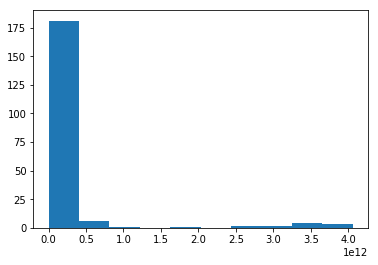

In [13]:
plt.hist(fitness_with_gems)

(array([ 183.,    7.,    2.,    0.,    0.,    0.,    3.,    2.,    0.,    3.]),
 array([  0.00000000e+00,   4.25741273e+11,   8.51482545e+11,
          1.27722382e+12,   1.70296509e+12,   2.12870636e+12,
          2.55444764e+12,   2.98018891e+12,   3.40593018e+12,
          3.83167145e+12,   4.25741273e+12]),
 <a list of 10 Patch objects>)

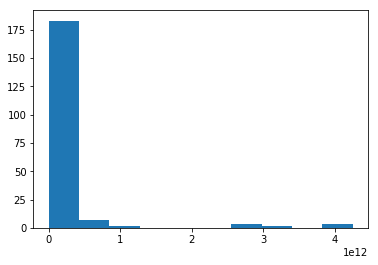

In [14]:
plt.hist(fitness_without_gems)